# Part II - Explanatory Slide Deck (Outcome)
## Communicating Data Findings on Prosper Loan Data Exploration and Visualization
## By Ayomide (Enoch) Fadeyi

## Investigation Overview

##  General Research Question guiding my analysis
### What are the main driving factors of outcome of loan?


> In part one of this project, the above question and a host of others have been answered during the exploratory data analysis stage. However, in this part two, I intend to carry out explanatory data analysis, explaining my findings using visuals and interpretation of these visuals. I will be adding a summary of key insights as contained in the README.md. This will helps my notebook to stay aligned to the key insights I want to include in my slide deck.

## Key Insights for Presentation

*** Those with low prosper rating are found to have highest rates of default in credits. 

  *** The business category tend to have larger amount. This implies that majority of the loans were gotten for business purposes.



## Dataset Overview

> ## Introduction

> Introducing my dataset
*** Loan Data from Prosper: This data set contains 113,937 observations (loans) with 81 features (variables/columns) on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
Here is the link to the data dictionary to understand the dataset's variables: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("C:/Users/USER/Desktop/prosperLoanData.csv")

In [3]:
target_features =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [4]:
target_df = df[target_features]

In [5]:
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [6]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index() # Drop missing values in Prosper Rating

In [7]:
# Convert LoanOriginationDate to datetime datatype
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [8]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0) #fill in missing values Total Prosper Loan

### Observation 1

The majority of borrowers are employed.
It is worthy of note that full-time and self employed workers 
request for more loans than the rest.

### Visualization 1

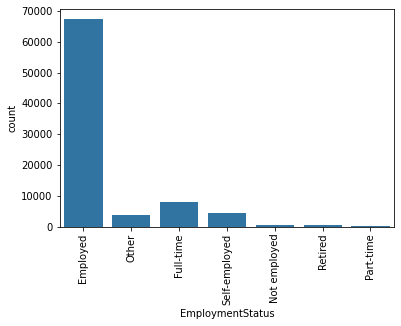

In [9]:
#freq_count = target_df['index'].value_counts()
# Setting color
base_color = sns.color_palette()[0]
sns.countplot(data=target_df, x='EmploymentStatus', color = base_color )
plt.xticks(rotation = 90);

In [10]:
# Here, I'm just trying to restructure the Loan Status variable in the data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

### After transforming dataset, we have 19,664 completed loans and 6,341 defaulted.

In [11]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categories, axis=1)
listing_categories = target_df['ListingCategory (numeric)'].value_counts()

### Observation 2
As seen in the below visual, there is a significant difference between the completed Loan and defaulted Loan of employed and unemployed. The employed tend to complete their loans than the unemployed


### Visualization 2

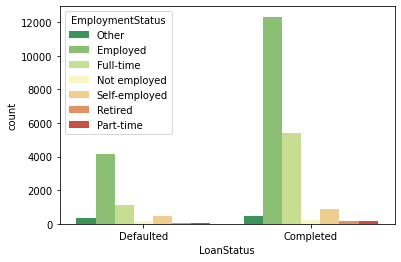

In [15]:
sns.countplot(x = 'LoanStatus', hue = 'EmploymentStatus', data = target_df, color=base_color, palette = 'RdYlGn_r');

### Observation 3

1. Except for the lowest ratings defaulted credits tend to be larger than completed.
2. Most of the defaulted credits comes from individuals with low Prosper rating.

### Visualization 3



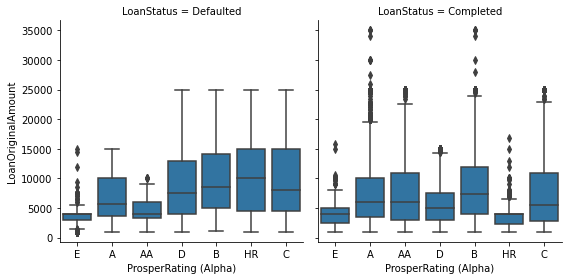

In [13]:
facet_boxplot = sns.FacetGrid(data = target_df, col = 'LoanStatus', size = 4)
facet_boxplot.map(sns.boxplot, 'ProsperRating (Alpha)', 'LoanOriginalAmount')

### Observation 4

1. Business listing category have larger amount of completed loans.
2. Home improvement have larger amount of defauled loans.

### Visualization 4


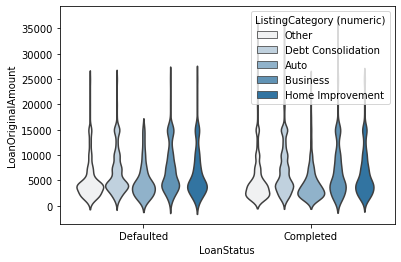

In [14]:
sns.violinplot(data=target_df, y='LoanOriginalAmount', x='LoanStatus', hue = 'ListingCategory (numeric)', color=base_color, inner=None, figsize = [20, 18]);